In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import matplotlib
matplotlib.rcParams.update({'font.size': 14, "font.family":"serif", "font.serif":["Times New Roman"], "mathtext.fontset" : "cm"})
import gc

2022-12-14 19:35:21.963848: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 19:35:35.470615: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-14 19:35:55.382541: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.5/lib64/:
2022-12-14 19:35:55.396100: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: c

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input((32,32,3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

model.save("ANN_Deep")

2022-12-14 19:36:57.913034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 19:36:59.295399: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.5/lib64/:
2022-12-14 19:36:59.295431: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-12-14 19:36:59.370379: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized 

Epoch 1/10


2022-12-14 19:37:00.765215: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 18s 11ms/step - loss: 1.9208 - accuracy: 0.2958 - val_loss: 1.7720 - val_accuracy: 0.3591
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.7427 - accuracy: 0.3699 - val_loss: 1.7159 - val_accuracy: 0.3924
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6614 - accuracy: 0.4036 - val_loss: 1.5966 - val_accuracy: 0.4315
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5953 - accuracy: 0.4281 - val_loss: 1.5861 - val_accuracy: 0.4336
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5563 - accuracy: 0.4396 - val_loss: 1.5321 - val_accuracy: 0.4574
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5177 - accuracy: 0.4571 - val_loss: 1.5344 - val_accuracy: 0.4575
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4869 - accuracy: 0.4690 - val_loss: 1.5091 - val_accura

INFO:tensorflow:Assets written to: ANN_Deep/assets


In [6]:
new_model = tf.keras.models.load_model('ANN_Deep')

In [7]:
def getWeightShapes(myModel):
    weightShapes = []
    for i in range(len(myModel.layers)):
        weights = myModel.layers[i].weights
        weightShapes.append([x.shape for x in weights])

    return weightShapes

In [8]:
weightShapes = getWeightShapes(new_model)

In [9]:
weightStart = []
weightEnd = []
for layers in weightShapes:
    weightStart.append([np.random.normal(size=x) for x in layers])
    weightEnd.append([np.random.normal(size=x) for x in layers])

In [10]:
alphaRange = [x / 10.0 for x in range(-2, 12, 1)]

lineWeights = []
for a in alphaRange:
    weightVector = []
    for i in range(len(weightStart)):
        weightVector.append([(weightEnd[i][j]*(1-a) - weightStart[i][j]*a) for j in range(len(weightEnd[i]))])
    lineWeights.append(weightVector)

In [12]:
def setWeights(model, weightVector):
    for i in range(len(model.layers)):
        model.layers[i].set_weights(weightVector[i])

In [14]:
randomModel = tf.keras.models.load_model('ANN_Deep')
evals = []
for weightVector in tqdm(lineWeights):
    setWeights(randomModel, weightVector)
    evals.append(randomModel.evaluate(train_images, train_labels, batch_size = 128, verbose=0))
    tf.keras.backend.clear_session()
    gc.collect()

  0%|          | 0/14 [00:00<?, ?it/s]

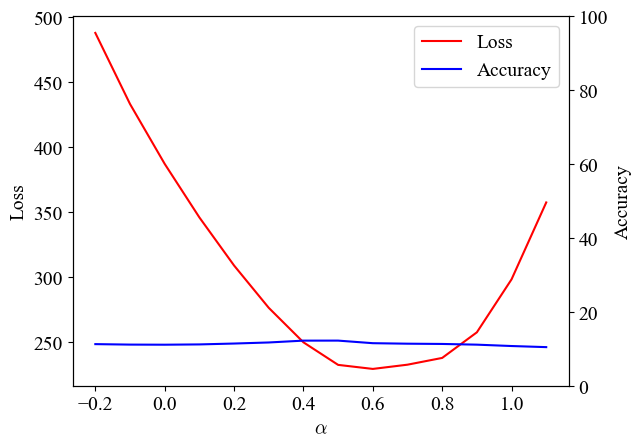

In [29]:
evals = np.asarray(evals)
ax1 = plt.gca()
ax2 = ax1.twinx()
lns1 = ax1.plot(alphaRange, evals.T[0], 'r', label = "Loss")
lns2 = ax2.plot(alphaRange, evals.T[1]*100, 'b', label = "Accuracy")
ax2.set_ylim([0,100])
ax1.set_xlabel(r'$ \alpha $')
ax1.set_ylabel("Loss")
ax2.set_ylabel("Accuracy")
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.show()

In [9]:
weightStart = []
weightEnd = []
weightCenter = []
for layers in weightShapes:
    weightStart.append([np.random.normal(size=x) for x in layers])
    weightEnd.append([np.random.normal(size=x) for x in layers])
    weightCenter.append([np.random.normal(size=x) for x in layers])

In [10]:
alphaRange = [x / 10.0 for x in range(-2, 13, 1)]
betaRange = [x / 10.0 for x in range(-2, 13, 1)]

lineWeights = []
for a in alphaRange:
    for b in betaRange:
        weightVector = []
        for i in range(len(weightStart)):
            weightVector.append([(weightCenter[i][j] + weightEnd[i][j]*(a) - weightStart[i][j]*b) for j in range(len(weightEnd[i]))])
        lineWeights.append(weightVector)

In [11]:
randomModel = tf.keras.models.load_model('ANN')
evals = []
for weightVector in tqdm(lineWeights):
    setWeights(randomModel, weightVector)
    evals.append(randomModel.evaluate(train_images, train_labels, batch_size = 128, verbose=0))
    tf.keras.backend.clear_session()
    gc.collect()

100%|██████████| 225/225 [11:59<00:00,  3.20s/it]


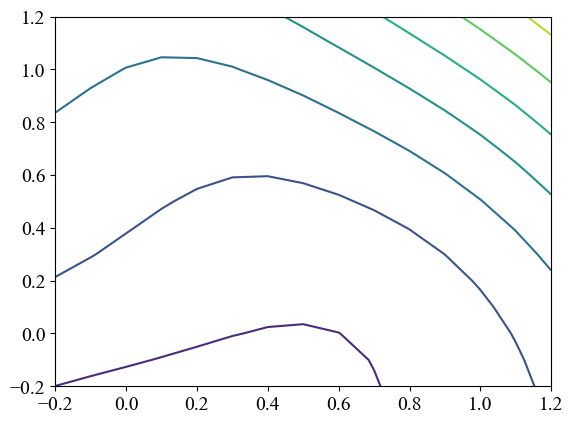

In [ ]:
evals = np.asarray(evals)
e = evals.reshape(len(alphaRange), len(betaRange), 2)
[X, Y] = np.meshgrid(alphaRange, betaRange)
plt.contour(X, Y, e[:,:,0])
plt.show()

In [28]:
e[:,:,0].shape

(15, 15)

In [44]:
weightStart = []
weightEnd = []
weightCenter = []
for i in range(len(weightShapes)):
    weightCenter.append([new_model.layers[i].weights[j] for j in range(len(weightShapes[i]))])
    weightEnd.append([np.random.normal(size=weightShapes[i][j])*np.linalg.norm(new_model.layers[i].weights[j]) for j in range(len(weightShapes[i]))])
    weightStart.append([np.random.normal(size=weightShapes[i][j])*np.linalg.norm(new_model.layers[i].weights[j]) for j in range(len(weightShapes[i]))])

In [45]:
alphaRange = [x / 10.0 for x in range(-2, 13, 1)]
betaRange = [x / 10.0 for x in range(-2, 13, 1)]

lineWeights = []
for a in alphaRange:
    for b in betaRange:
        weightVector = []
        for i in range(len(weightStart)):
            weightVector.append([(weightCenter[i][j] + weightEnd[i][j]*(a) - weightStart[i][j]*b) for j in range(len(weightEnd[i]))])
        lineWeights.append(weightVector)

In [46]:
randomModel = tf.keras.models.load_model('ANN')
evals = []
for weightVector in tqdm(lineWeights):
    setWeights(randomModel, weightVector)
    evals.append(randomModel.evaluate(train_images, train_labels, batch_size = 128, verbose=0))
    tf.keras.backend.clear_session()
    gc.collect()

100%|██████████| 225/225 [15:40<00:00,  4.18s/it]


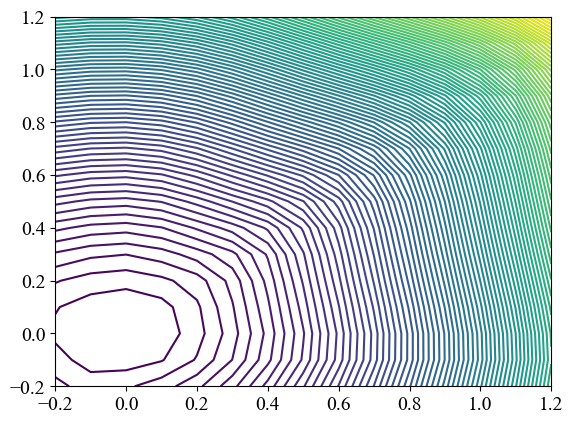

In [48]:
evals = np.asarray(evals)
e = evals.reshape(len(alphaRange), len(betaRange), 2)
[X, Y] = np.meshgrid(alphaRange, betaRange)
plt.contour(X, Y, e[:,:,0], 100)
plt.show()

In [37]:
np.min(e[:,:,0])

57774.16015625

In [38]:
new_model.evaluate(train_images, train_labels)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.4911 - accuracy: 0.4733


[1.4911253452301025, 0.47332000732421875]

In [39]:
setWeights(randomModel, weightCenter)

In [43]:
new_model.layers[1].weights[0]

<tf.Variable 'dense_6/kernel:0' shape=(3072, 256) dtype=float32, numpy=
array([[-0.03123008, -0.01207907,  0.00949081, ...,  0.01027627,
         0.02566934,  0.0500416 ],
       [ 0.01126856,  0.02988845,  0.02631906, ..., -0.03571005,
         0.0386585 , -0.01198726],
       [ 0.01361436,  0.01358229,  0.01203866, ...,  0.03222532,
        -0.03069091, -0.16113071],
       ...,
       [-0.02250448,  0.01262173, -0.00426545, ...,  0.02296227,
        -0.01484196, -0.1543391 ],
       [ 0.00745668,  0.03170822, -0.01137875, ..., -0.03772271,
         0.03759925, -0.19758825],
       [-0.02929373, -0.04178645,  0.01809453, ..., -0.00769409,
        -0.02169129, -0.14086784]], dtype=float32)>

In [41]:
weightCenter

[[],
 [array([[ 45.53924486, -58.36410899, -26.39129915, ..., -34.90888287,
           28.17753285,  60.37348803],
         [ 11.00171422, -18.46565581,  19.59785925, ...,  38.17559358,
           61.51699824,  47.66052953],
         [-16.14429198,  13.25058096,  19.93374683, ...,  34.76035525,
           30.37836204,  47.05695202],
         ...,
         [  6.58626643, -26.83293224,  28.92503606, ..., -13.78388311,
           46.15851678, -27.27982594],
         [-61.15627943, -28.8521835 ,  30.82664278, ...,  -6.96974025,
          -12.6197936 , -34.94290352],
         [ 57.69062584,   1.43187929,  50.3720398 , ..., -25.78194841,
          -47.87978149,  23.69353599]]),
  array([-2.59350978e+00, -3.09928401e-01,  1.95080653e+00,  8.79185042e-01,
          4.49969777e+00,  1.31220809e+00,  2.21631521e+00, -1.21153923e+00,
         -3.61320869e+00,  1.32066405e+00, -4.36465723e+00, -4.64147866e-01,
         -2.31645460e+00,  4.75519558e+00,  3.12889147e+00,  2.67253194e+00,
         -8

In [40]:
randomModel.evaluate(train_images, train_labels)

1563/1563 [==============================] - 7s 4ms/step - loss: 58692.6602 - accuracy: 0.1094


[58692.66015625, 0.10937999933958054]